In [2]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [3]:
df = pd.read_csv("NEW_Keywords_advisor.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,***Seek advice or money management resources**...,0,1,Isn't it time for you to make a plan in managi...
1,1,I also thought about reaching out to a financi...,6,1,Where to begin? Wanting to buy a home.
2,2,Guys lie about their age.People using phising ...,5,3,How to become more street smart with limited e...
3,3,I met with my advisor and picked out some clas...,0,9,Victories over my mental health I’d like to share
4,4,"First it was because it was overwhelming, then...",14,1,I'm 26F and thinking about going back to school
...,...,...,...,...,...
523,530,"Hi, a family friend of ours who works as a fin...",18,1,Fee based on % of investment portfolio question
524,531,But a financial advisor has pointed out to me ...,13,1,Max out backdoor ROTH every year or just low t...
525,532,My financial advisor recommended more LTD cove...,2,1,Long Term Disability Insurance
526,533,I’m meeting with my advisor and gonna take of ...,4,1,Follow up post about leaving school/changing m...


In [4]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [5]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [6]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [8]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [9]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [10]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

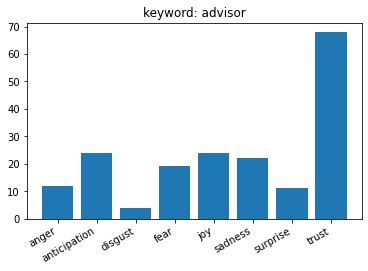

In [11]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: advisor')
plt.show()

In [12]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [14]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0      [seek, advice, or, money, management, resource...
1      [i, also, thought, about, reaching, out, to, a...
2      [guys, lie, about, their, agepeople, using, ph...
3      [i, met, with, my, advisor, and, picked, out, ...
4      [first, it, was, because, it, was, overwhelmin...
                             ...                        
523    [hi, a, family, friend, of, ours, who, works, ...
524    [but, a, financial, advisor, has, pointed, out...
525    [my, financial, advisor, recommended, more, lt...
526    [i, ’, m, meeting, with, my, advisor, and, gon...
527    [so, yesterday, i, was, meeting, with, a, facu...
Name: selftext, Length: 528, dtype: object


In [16]:
trust=emo(tokens,'trust')
wordcloud(trust)

NameError: name 'itertools' is not defined

In [ ]:
Counter(trust).most_common(10)

In [ ]:
fear=emo(tokens,'fear')
wordcloud(fear)

In [ ]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [ ]:
Counter(anticipation).most_common(10)

In [ ]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

In [ ]:
anger=emo(tokens,'anger')
wordcloud(anger)

In [ ]:
joy=emo(tokens,'joy')
wordcloud(joy)